<a href="https://colab.research.google.com/github/pongpichaGithub/Correlation-for-Crypto/blob/main/Spearman_Correlation_for_Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance scipy seaborn matplotlib pandas

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Spearman correlation between BTC and ETH: 0.9189748332666876


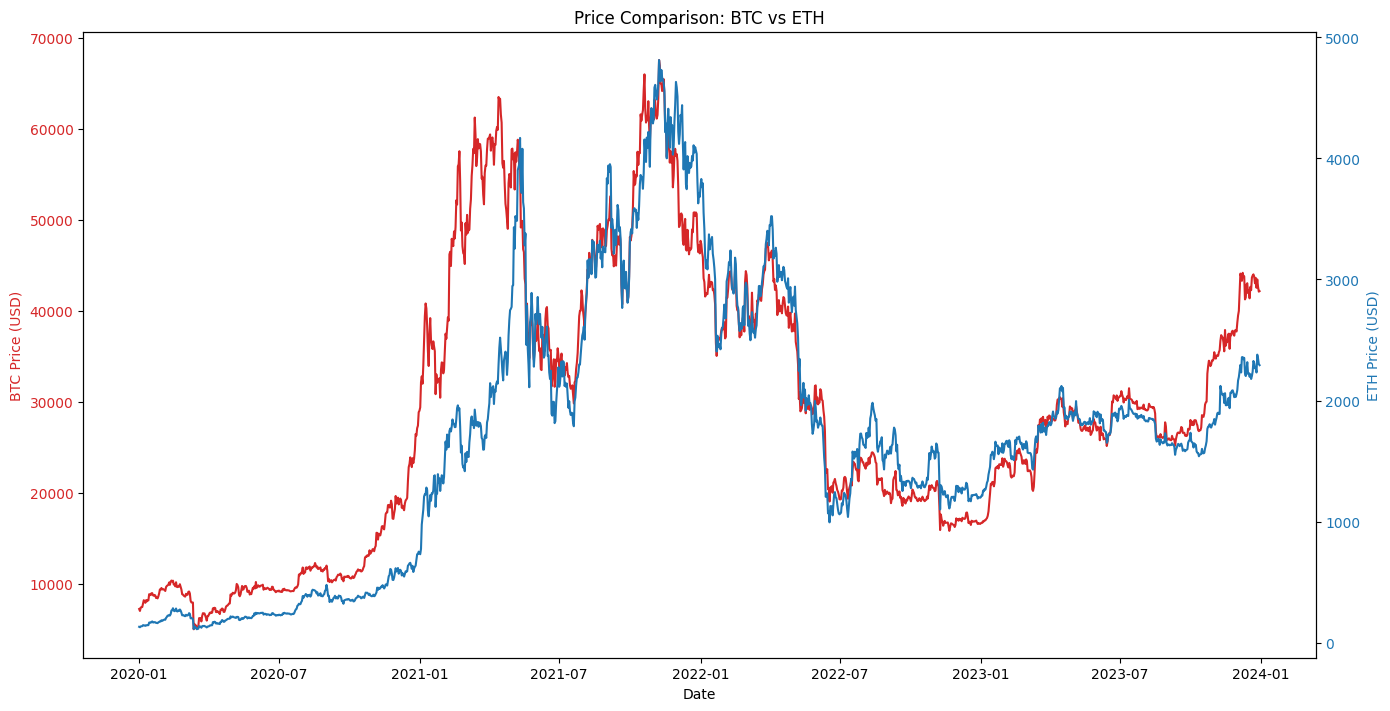

In [ ]:
#Double Y-Axis Chart
import yfinance as yf
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Download price data from Yahoo Finance
btc = yf.download('BTC-USD', start='2020-01-01', end='2023-12-31')
eth = yf.download('ETH-USD', start='2020-01-01', end='2023-12-31')

# Combine price data
df = pd.DataFrame({
    'BTC': btc['Close'],
    'ETH': eth['Close']
}).dropna()

# Calculate Spearman Correlation
spearman_corr, _ = spearmanr(df['BTC'], df['ETH'])
print(f"Spearman correlation between BTC and ETH: {spearman_corr}")

# Plot the prices of BTC and ETH using two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price (USD)', color=color)
ax1.plot(df.index, df['BTC'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('ETH Price (USD)', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index, df['ETH'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Price Comparison: BTC vs ETH')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Spearman correlation between BTC and ETH: 0.9189748332666876


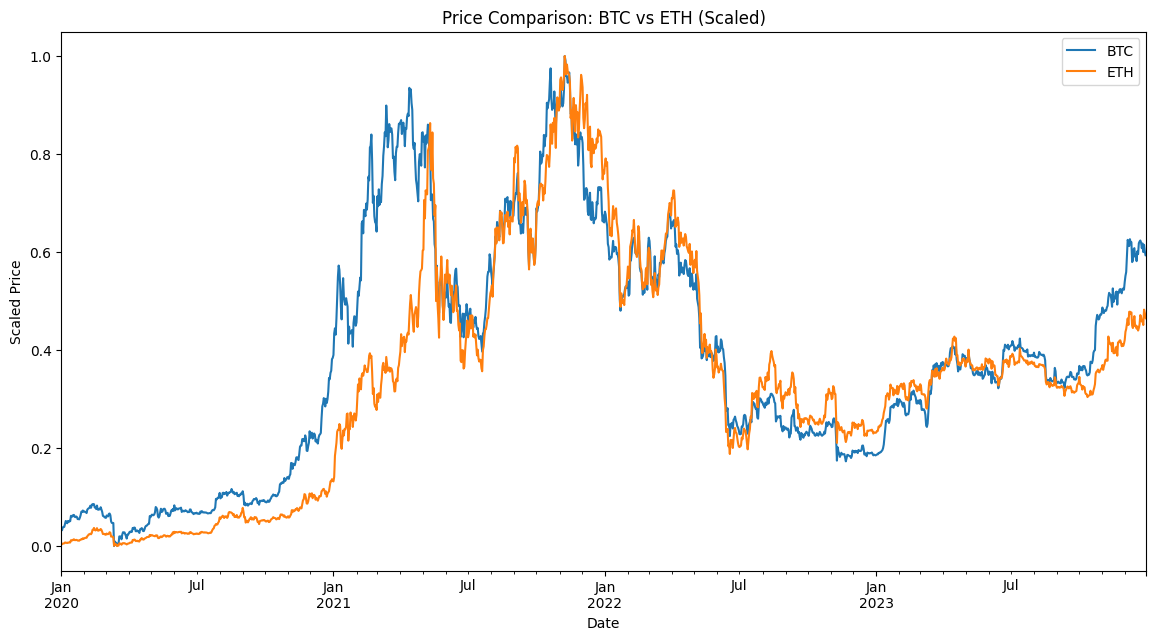

In [ ]:
#MinMaxScaler
import yfinance as yf
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Download price data from Yahoo Finance
btc = yf.download('BTC-USD', start='2020-01-01', end='2023-12-31')
eth = yf.download('ETH-USD', start='2020-01-01', end='2023-12-31')

# Combine price data
df = pd.DataFrame({
    'BTC': btc['Close'],
    'ETH': eth['Close']
}).dropna()

# Use MinMaxScaler to scale the data between 0 and 1
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Calculate Spearman Correlation on the unscaled data
spearman_corr, _ = spearmanr(df['BTC'], df['ETH'])
print(f"Spearman correlation between BTC and ETH: {spearman_corr}")

# Plot the scaled prices of BTC and ETH
df_scaled.plot(figsize=(14, 7))
plt.title('Price Comparison: BTC vs ETH (Scaled)')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend(['BTC', 'ETH'])
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


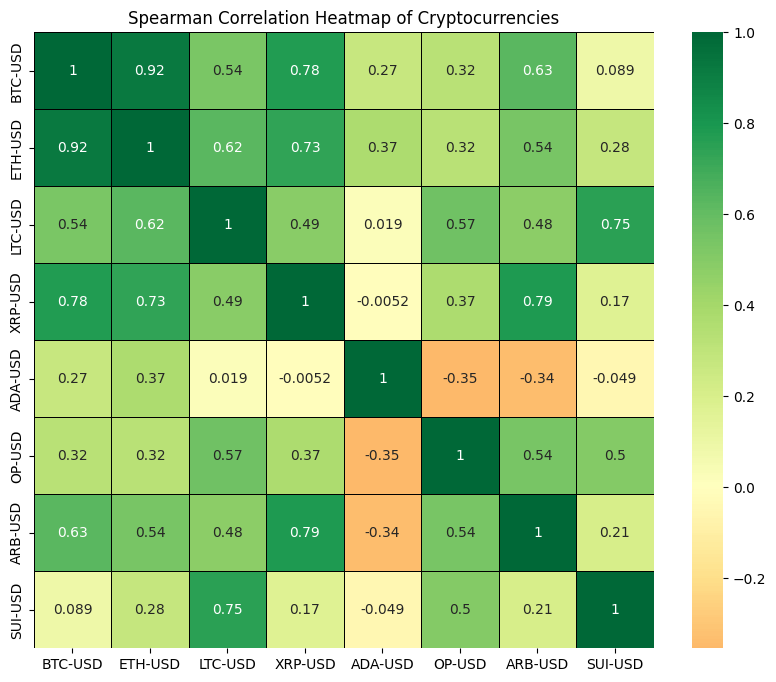

In [ ]:
#Spearman Correlation
import yfinance as yf
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

#symbol
cryptos = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'XRP-USD', 'ADA-USD', 'OP-USD', 'ARB-USD', 'SUI-USD']

# Extract price information from Yahoo Finance
data = {}
for crypto in cryptos:
    data[crypto] = yf.download(crypto, start='2020-01-01', end='2023-12-31')['Close']

# DataFrame
df = pd.DataFrame(data)

# Find shared dates
df = df.dropna()

# calculate Spearman Correlation
spearman_corr_matrix = df.corr(method='spearman')

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='RdYlGn', center=0, linewidths=0.5, linecolor='black')
plt.title('Spearman Correlation Heatmap of Cryptocurrencies')
plt.show()
